In [29]:
import pandas as pd
import numpy as np
#To display every columns
pd.set_option('display.max_columns', None)
df= pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [31]:
# Checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Categorical & Numerical values

In [33]:
cat_col = [col for col in df.columns if df[col].dtype=='object'] # iF You want to get a list you have to put third bracket
print('Categorical columns: ',cat_col)
num_col= [ col for col in df.columns if df[col].dtype != 'object']
print("Numerical columns: ", num_col)

Categorical columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [34]:
# Checking the total number of unique values here
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [35]:
df[num_col].nunique()

PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

## Removal of redundant and Irrelevant Data

In [36]:
# As we know the name will be unique always so it's of no use.
# Lets check the ticket columns if it's important or not
df['Ticket'].unique()[:50] 

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [37]:
# As we know machine doesn't understand Categorical Values.
# lets drop name and ticket
df1= df.drop( columns= ['Name','Ticket'])
df1.shape #row and column

(891, 10)

In [38]:
# To find out null values
round( (df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [39]:
df2 = df1.drop( columns='Cabin')
df2.dropna( subset=['Embarked'], axis=0, inplace= True)
df2.shape 

(889, 9)

In [44]:
df3= df2.fillna(df2['Age'].mean())
df3.isnull().sum()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

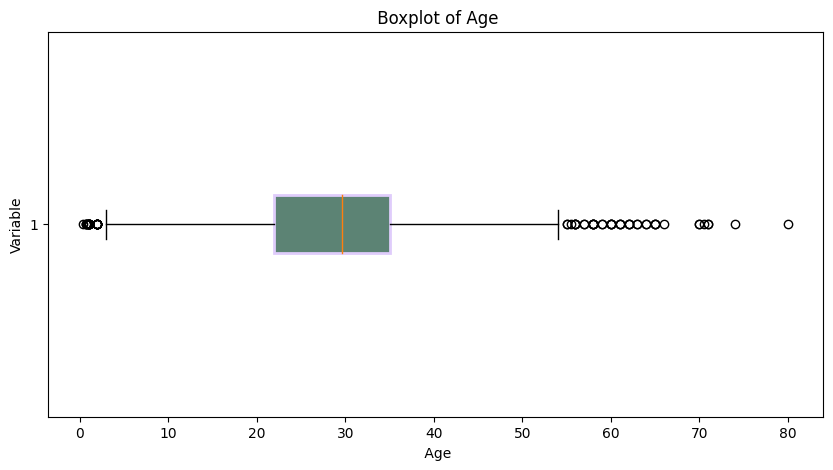

In [59]:
# Boxplot to detect outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
boxes= plt.boxplot(df3['Age'], vert= False, patch_artist=True)
 
for box in boxes['boxes']:
    box.set(color= '#DFCCFB', linewidth= 2)
    box.set(facecolor='#5C8374')

plt.ylabel('Variable')
plt.xlabel(" Age")
plt.title(" Boxplot of Age")
plt.show()

Lower Bound: 3.7624250583552623
Upper Bound: 55.63581023576238


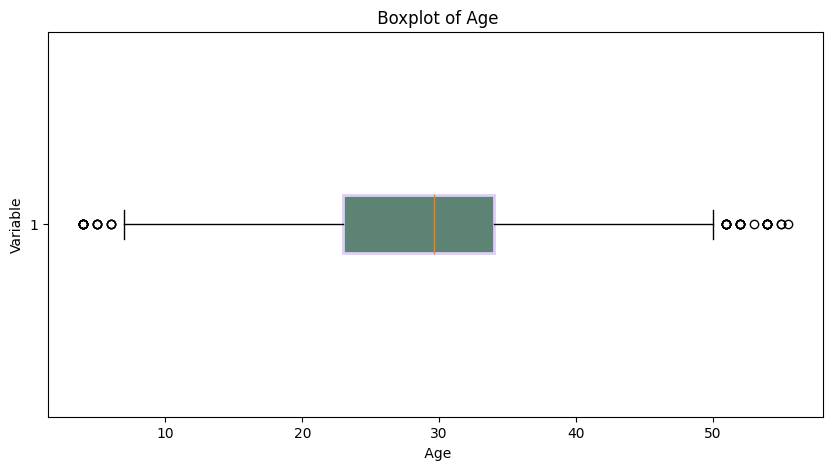

In [63]:
## Removing outliers
mean = df['Age'].mean()
std = df3['Age'].std()
lower_bound= mean - std*2
upper_bound= mean + std*2 
print( "Lower Bound:",lower_bound)
print( "Upper Bound:",upper_bound)
df4 = df3[ (df3['Age'] >= lower_bound) & (df3['Age']<= upper_bound)]
# Boxplot to detect outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
boxes= plt.boxplot(df4['Age'], vert= False, patch_artist=True)
 
for box in boxes['boxes']:
    box.set(color= '#DFCCFB', linewidth= 2)
    box.set(facecolor='#5C8374')

plt.ylabel('Variable')
plt.xlabel(" Age")
plt.title(" Boxplot of Age")
plt.show()

By This way mentioned above we can remove the outliers from other columns

## Data Transformation

In [68]:
# First we select independent variable
X= df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
#Select Target Variable
y= df3['Survived']

In [76]:
# Min-Max Scalling
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))

num_col_= [col for col in X.columns if X[col].dtype != 'object']
x1= X
x1[num_col_] = scaler.fit_transform(x1 [num_col_])
x1.head() 

C:\Users\USER\AppData\Local\Temp\ipykernel_13180\1440207441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1 [num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S
